## HW5: Clustering

With the accidents involving Boeing's 737 Max, there have been speculations and concerns about airline safety. Then, there was a helicopter crash involving Kobe Bryant. Academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters.

Should travelers avoid airlines that have had crashes in the past? The dataset for this has been sourced from Aviation Safety Network and available at this link: 
https://www.kaggle.com/fivethirtyeight/fivethirtyeight-airline-safety-dataset

#### Dataset Attributes

airline: Airline (asterisk indicates that regional subsidiaries are included)

avail_seat_km_per_week: Available seat kilometers flew every week

incidents_85_99: Total number of incidents, 1985–1999

fatal_accidents_85_99: Total number of fatal accidents, 1985–1999

fatalities_85_99: Total number of fatalities, 1985–1999

incidents_00_14: Total number of incidents, 2000–2014

fatal_accidents_00_14: Total number of fatal accidents, 2000–2014

fatalities_00_14: Total number of fatalities, 2000–2014

### Step 1:

Use this dataset and two different clustering approaches (agglomerative and divisive) to group the airlines with similar safety records.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv(r"C:\Users\stlp\Downloads\airline-safety.csv")

In [7]:
print(df.shape)
df.head()

(56, 8)


,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [8]:
# preprocessing
data = df.drop('airline', axis = 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# decomposition for clustering 2D visualization
principle = PCA(n_components = 2)
data_principle = principle.fit_transform(data_scaled)

### k-Means

In [10]:
# Divisive
# k-Means
# k range: 2 (safe - unsafe) - 8 (default value)

# models & scoring 
fits1 = []
scores1 = []

for k in range(2,9):
    model = KMeans(n_clusters = k, random_state = 16, n_init = 'auto').fit(data_scaled)
    fits1.append(model)

    model_score = silhouette_score(data_scaled, model.labels_, metric = 'euclidean')
    scores1.append(model_score)

C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

### Agglomerative

In [12]:
# agglomerative
# k range: 2 (default) - 8 (for consistency with kmeans)

# models & scoring 
fits2 = []
scores2 = []

for k in range(2,9):
    model = AgglomerativeClustering(n_clusters = k).fit(data_scaled)
    fits2.append(model)

    model_score = silhouette_score(data_scaled, model.labels_, metric = 'euclidean')
    scores2.append(model_score)

### Step 2: 

Do these two approaches lead to the same/similar results? Provide appropriate visualizations, clustering summaries, and your interpretations.

C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

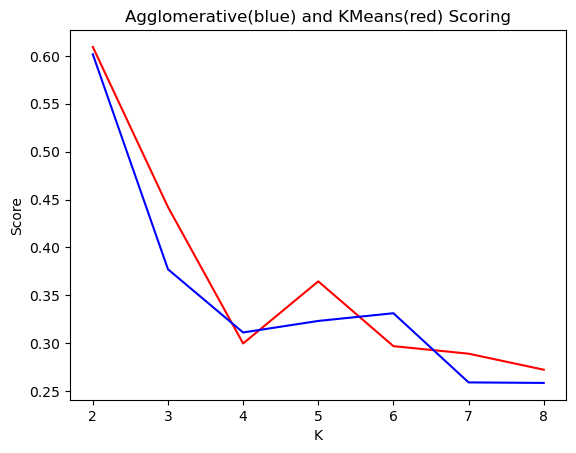

In [14]:
# score comparison graph
sns.lineplot(x = range(2,9), y = scores1, color = 'r')
sns.lineplot(x = range(2, 9), y = scores2, color = 'b')
plt.title('Agglomerative(blue) and KMeans(red) Scoring')
plt.xlabel('K')
plt.ylabel('Score')

plt.savefig('cluster_scoring.png')
plt.show()


Both models begin to perform worse at k = 4. So, using the elbow method, both models will use 4 clusters. 

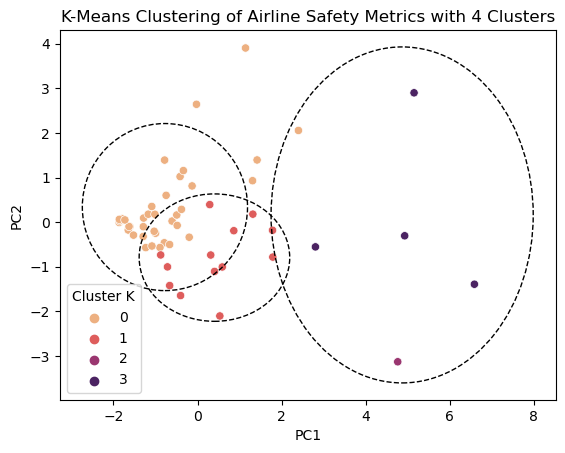

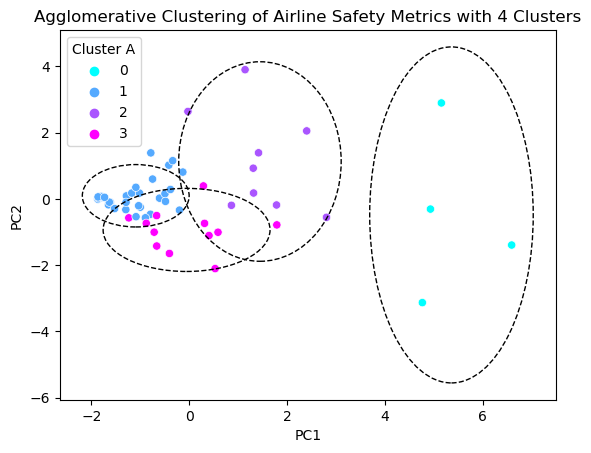

In [16]:
# group visualization
selected_model1 = fits1[2]
df_principle = pd.DataFrame(data_principle, columns = ['PC1', 'PC2'])
df_principle['Cluster K'] = selected_model1.labels_

# plot clusters
sns.scatterplot(data = df_principle, x = 'PC1', y = 'PC2', hue = 'Cluster K', palette = 'flare')
plt.title('K-Means Clustering of Airline Safety Metrics with 4 Clusters')

# general cluster areas
# cluster 2 does not have area, 1 point
for cluster in np.unique(selected_model1.labels_):
    cluster_data = df_principle[df_principle['Cluster K'] == cluster]
    ellipse = patches.Ellipse(cluster_data[['PC1', 'PC2']].mean().values,
                              width = cluster_data['PC1'].std() * 4,
                              height = cluster_data['PC2'].std() * 4,
                              edgecolor = 'black', 
                              facecolor = 'none', 
                              linestyle = '--', 
                              linewidth = 1)
    plt.gca().add_patch(ellipse)

plt.savefig('kmeans_cluster.png')
plt.show()

selected_model2 = fits2[2]
df_principle['Cluster A'] = selected_model2.labels_

# plot clusters
sns.scatterplot(data = df_principle, x = 'PC1', y = 'PC2', hue = 'Cluster A', palette = 'cool')
plt.title('Agglomerative Clustering of Airline Safety Metrics with 4 Clusters')

# general cluster areas
for cluster in np.unique(selected_model2.labels_):
    cluster_data = df_principle[df_principle['Cluster A'] == cluster]
    ellipse = patches.Ellipse(cluster_data[['PC1', 'PC2']].mean().values,
                              width = cluster_data['PC1'].std() * 4,
                              height = cluster_data['PC2'].std() * 4,
                              edgecolor = 'black', 
                              facecolor = 'none', 
                              linestyle = '--', 
                              linewidth = 1)
    plt.gca().add_patch(ellipse)

plt.savefig('agglo_cluster.png')
plt.show()

In [17]:
# report safety metrics
df['Cluster K'] = selected_model1.labels_

# average safety metrics by cluster
safety_metrics1 = df.groupby('Cluster K').agg({
    'incidents_85_99': 'mean',
    'fatal_accidents_85_99': 'mean',
    'fatalities_85_99': 'mean',
    'incidents_00_14': 'mean',
    'fatal_accidents_00_14': 'mean',
    'fatalities_00_14': 'mean'
}).reset_index()

In [18]:
safety_metrics1['incidents_mean'] = (safety_metrics1['incidents_85_99'] + safety_metrics1['incidents_00_14']) / 2
safety_metrics1['fatal_mean'] = (safety_metrics1['fatal_accidents_85_99'] + safety_metrics1['fatal_accidents_00_14']) / 2
safety_metrics1['fatalities_mean'] = (safety_metrics1['fatalities_85_99'] + safety_metrics1['fatalities_00_14']) / 2

safety_metrics1

,Cluster K,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incidents_mean,fatal_mean,fatalities_mean
0,0,3.605263,0.947368,26.842105,2.947368,0.447368,49.052632,3.276316,0.697368,37.947368
1,1,8.384615,3.076923,315.076923,3.615385,0.769231,42.923077,6.000000,1.923077,179.000000
2,2,76.000000,14.000000,128.000000,6.000000,1.000000,88.000000,41.000000,7.500000,108.000000
3,3,20.000000,8.000000,262.750000,16.500000,2.250000,149.750000,18.250000,5.125000,206.250000


In [19]:
# report safety metrics
df['Cluster A'] = selected_model2.labels_

# average safety metrics by cluster
safety_metrics2 = df.groupby('Cluster A').agg({
    'incidents_85_99': 'mean',
    'fatal_accidents_85_99': 'mean',
    'fatalities_85_99': 'mean',
    'incidents_00_14': 'mean',
    'fatal_accidents_00_14': 'mean',
    'fatalities_00_14': 'mean'
}).reset_index()


In [20]:
safety_metrics2['incidents_mean'] = (safety_metrics2['incidents_85_99'] + safety_metrics2['incidents_00_14']) / 2
safety_metrics2['fatal_mean'] = (safety_metrics2['fatal_accidents_85_99'] + safety_metrics2['fatal_accidents_00_14']) / 2
safety_metrics2['fatalities_mean'] = (safety_metrics2['fatalities_85_99'] + safety_metrics2['fatalities_00_14']) / 2

safety_metrics2

,Cluster A,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incidents_mean,fatal_mean,fatalities_mean
0,0,35.000000,9.750000,238.750000,15.250000,2.000000,166.000000,25.125000,5.875000,202.375000
1,1,3.096774,0.741935,14.129032,2.580645,0.225806,14.032258,2.838710,0.483871,14.080645
2,2,10.444444,3.222222,128.888889,6.222222,2.000000,179.111111,8.333333,2.611111,154.000000
3,3,6.000000,2.583333,311.833333,2.833333,0.333333,33.166667,4.416667,1.458333,172.500000


In [21]:
# set of airlines in safest clusters 
k = set(df[df['Cluster K'] == 0]['airline'])
a = set(df[df['Cluster A'] == 1]['airline'])

inter = k.intersection(a)
print(inter)

{'Xiamen Airlines', 'Cathay Pacific*', 'Royal Air Maroc', 'British Airways*', 'Southwest Airlines', 'Aer Lingus', 'Sri Lankan / AirLanka', 'Air Canada', 'Gulf Air', 'Virgin Atlantic', 'Alaska Airlines*', 'Lufthansa*', 'Condor', 'El Al', 'Philippine Airlines', 'Air New Zealand*', 'Hawaiian Airlines', 'Austrian Airlines', 'Aeromexico*', 'COPA', 'Finnair', 'All Nippon Airways', 'Qantas*', 'KLM*', 'TAP - Air Portugal', 'SAS*', 'LAN Airlines', 'TACA', 'Singapore Airlines', 'Aerolineas Argentinas', 'Alitalia'}


In [22]:
# set of airlines in most dangerous clusters
k = set(df[df['Cluster K'] == 3]['airline'])
a = set(df[df['Cluster A'] == 0]['airline'])

inter = k.intersection(a)
print(inter)

{'American*', 'Delta / Northwest*', 'United / Continental*'}
